In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

## SVM Train

In [8]:
tr_features = pd.read_csv('revised_data.csv',
                 usecols=[3,5,7,8,10,11],
                 encoding='latin')
tr_features['famSize'] = tr_features['SibSp']+tr_features['Parch']+1

tr_features = tr_features[['Pclass','Sex','Fare','Cabin','famSize']]

tr_output = pd.read_csv('revised_data.csv',
                 usecols=[2],
                 encoding='latin')  
tr_features

,Pclass,Sex,Fare,Cabin,famSize
0,3,0,7.2500,0,2
1,1,1,71.2833,1,2
2,3,1,7.9250,0,1
3,1,1,53.1000,2,2
4,3,0,8.0500,0,1
...,...,...,...,...,...
886,2,0,13.0000,7,1
887,1,1,30.0000,145,1
888,3,1,23.4500,0,4
889,1,0,30.0000,146,1


In [9]:
te_features = pd.read_csv('revised_test.csv',
                 usecols=[2,4,6,7,9,10],
                 encoding='latin')
#te_features = te_features.dropna()
mean = te_features["Fare"].dropna().mean()
te_features["Fare"] = te_features["Fare"].fillna(mean)
te_features['famSize'] = te_features['SibSp']+te_features['Parch']+1

te_features = te_features[['Pclass','Sex','Fare','Cabin','famSize']]


te_output = pd.read_csv('submission_titanic.csv',
                 usecols=[1],
                 encoding='latin')
#te_output = te_output.drop(152)

te_features

,Pclass,Sex,Fare,Cabin,famSize
0,3,0,7.8292,0,1
1,3,1,7.0000,0,2
2,2,0,9.6875,0,1
3,3,0,8.6625,0,1
4,3,1,12.2875,0,3
...,...,...,...,...,...
413,3,0,8.0500,0,1
414,1,1,108.9000,76,1
415,3,0,7.2500,0,1
416,3,0,8.0500,0,1


In [10]:
svm=SVC(kernel='linear',C=10,gamma=0.1,random_state=200)
svm.fit(tr_features, tr_output.to_numpy().ravel())

SVC(C=10, gamma=0.1, kernel='linear', random_state=200)

In [11]:
#score=cross_val_predict(svm,te_features,te_output.to_numpy().ravel(),cv=10)
print(classification_report(svm.predict(te_features),te_output))
acc_svm=accuracy_score(svm.predict(te_features),te_output)
print(acc_svm)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       266
           1       0.67      0.70      0.68       152

    accuracy                           0.77       418
   macro avg       0.75      0.75      0.75       418
weighted avg       0.77      0.77      0.77       418

0.7655502392344498


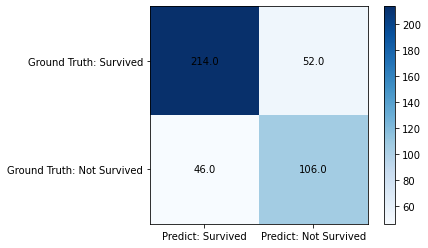

In [46]:
import matplotlib.pyplot as plt 
import matplotlib
fig, ax = plt.subplots()
confusion = confusion_matrix(svm.predict(te_features),te_output)
im = ax.imshow(confusion, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(yticks=[0, 1], 
       xticks=[0, 1], 
       yticklabels=['Ground Truth: Survived', 'Ground Truth: Not Survived'], 
       xticklabels=['Predict: Survived', 'Predict: Not Survived'])
for (r, c), val in np.ndenumerate(confusion):
    ax.text(c, r, '{:0.1f}'.format(val), ha='center', va='center')


## Random Forest Classifier

In [47]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(tr_features, tr_output.to_numpy().ravel())

RandomForestClassifier(n_jobs=2, random_state=0)

In [48]:
acc_rfc=accuracy_score(clf.predict(te_features),te_output)
acc_rfc

0.7870813397129187

In [49]:
print(confusion_matrix(clf.predict(te_features),te_output))

[[237  66]
 [ 23  92]]


In [50]:
print(classification_report(clf.predict(te_features),te_output))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       303
           1       0.58      0.80      0.67       115

    accuracy                           0.79       418
   macro avg       0.75      0.79      0.76       418
weighted avg       0.82      0.79      0.80       418



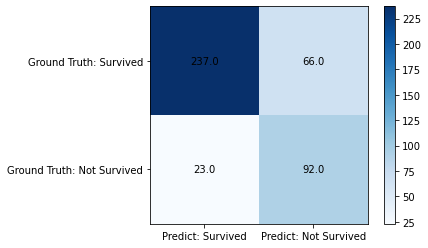

In [51]:
import matplotlib.pyplot as plt 
import matplotlib
fig, ax = plt.subplots()
confusion1 = confusion_matrix(clf.predict(te_features),te_output)
im1 = ax.imshow(confusion1, cmap=plt.cm.Blues)
ax.figure.colorbar(im1, ax=ax)
ax.set(yticks=[0, 1], 
       xticks=[0, 1], 
       yticklabels=['Ground Truth: Survived', 'Ground Truth: Not Survived'], 
       xticklabels=['Predict: Survived', 'Predict: Not Survived'])
for (r, c), val in np.ndenumerate(confusion1):
    ax.text(c, r, '{:0.1f}'.format(val), ha='center', va='center')




#sns.heatmap(confusion_matrix(clf.predict(te_features),te_output), annot=True,cmap="Blues")

## Correlation Map

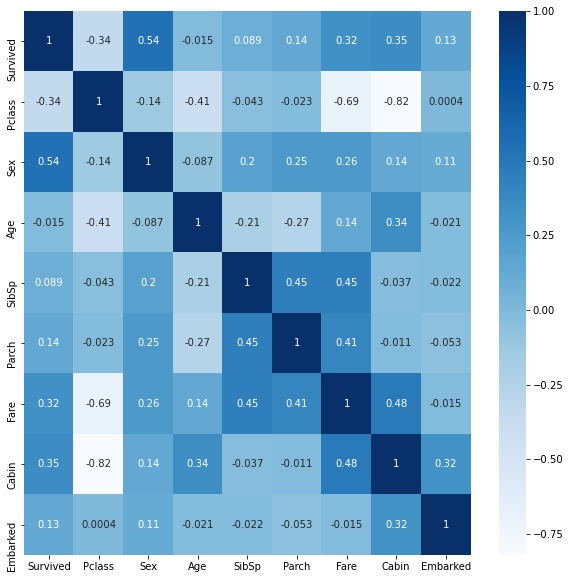

In [13]:
corr_dt = pd.read_csv('revised_data.csv',
                 usecols=[2,3,5,6,7,8,10,11,12],
                 encoding='latin')


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_dt.corr(method='spearman'),annot=True,cmap="Blues")
plt.savefig('out.png')

(0.0, 1.0)

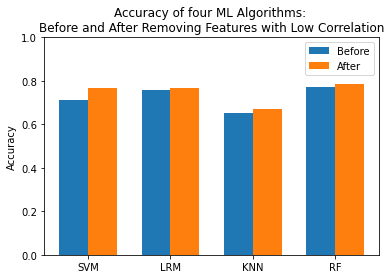

In [14]:
labels = ['SVM','LRM', 'KNN','RF']
before = [0.71, 0.758, 0.6531, 0.77]
after = [0.7655,0.7655,0.6698, 0.787]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before, width, label='Before')
rects2 = ax.bar(x + width/2, after, width, label='After')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of four ML Algorithms: \nBefore and After Removing Features with Low Correlation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim((0,1))